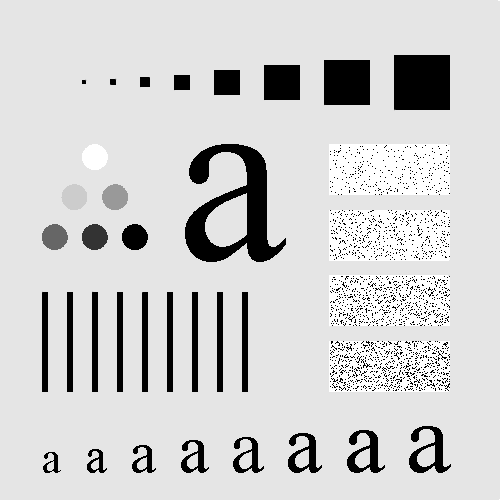

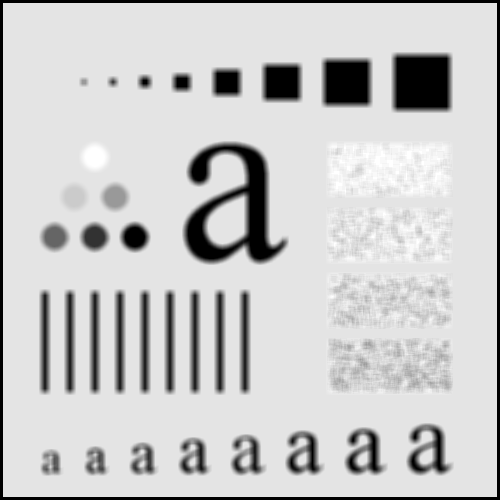

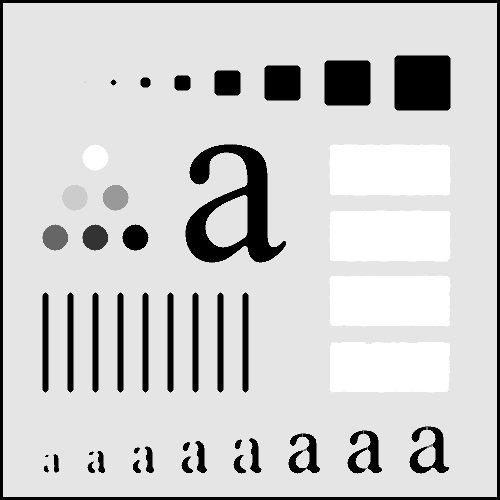

In [4]:
from PIL import Image
import numpy as np

def averaging(img_path, save_path, mask):
    with Image.open(img_path) as img:
        icol = img.size[0]
        irow = img.size[1]
        img_arr = np.array(img, dtype=np.uint8)
        
    display(img)

    img_new = np.zeros((irow, icol), dtype=np.uint8)
    mrow = mask.shape[0]
    mcol = mask.shape[1]

    for i in range(mrow//2, irow-mrow//2):
        for j in range(mcol//2, icol-mcol//2):
            temp = 0
            for k in range(mrow):
                for l in range(mcol):
                    temp += img_arr[i-mrow//2+k, j-mcol//2+l]*mask[k,l]
                    img_new[i, j] = temp

    result_img = Image.fromarray(img_new)
    result_img.save(save_path)
    display(result_img)

def median(img_path, save_path, mask):
    with Image.open(img_path) as img:
        icol = img.size[0]
        irow = img.size[1]
        img_arr = np.array(img, dtype=np.uint8)

    img_new = np.zeros((irow, icol), dtype=np.uint8)
    mrow = mask.shape[0]
    mcol = mask.shape[1]

    for i in range(mrow//2, irow-mrow//2):
        for j in range(mcol//2, icol-mcol//2):
            img_new[i, j] = np.median(img_arr[i-mrow//2:i+mrow//2, j-mcol//2:j+mcol//2])

    result_img = Image.fromarray(img_new)
    result_img.save(save_path)
    display(result_img)

mask = np.ones([7,7], dtype=int)
mask = mask/49
averaging('Fig0333(a)(test_pattern_blurring_orig).tif', 'averaging_lowpass.tif', mask)
median('Fig0333(a)(test_pattern_blurring_orig).tif','median_lowpass.tif', mask)